In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df_games = pd.read_csv('games.csv')
df_plays = pd.read_csv('plays.csv')
df_players = pd.read_csv('players.csv')
df_plays = df_plays.merge(df_games)
df_players.loc[len(df_players.index)] = [0, np.nan, np.nan, np.nan, np.nan, 'football', 'Football']

In [34]:
week = {}
for i in range(1, 18):
    week[i] = pd.read_csv('week' + str(i) + '.csv')
    week[i]['nflId'] = week[i]['nflId'].fillna(0.)
    week[i]['position'] = week[i]['position'].fillna('football')
    week[i] = week[i].merge(df_players, on=['nflId', 'displayName', 'position'])
    print(f'week {i} done!')

week 1 done!
week 2 done!
week 3 done!
week 4 done!
week 5 done!
week 6 done!
week 7 done!
week 8 done!
week 9 done!
week 10 done!
week 11 done!
week 12 done!
week 13 done!
week 14 done!
week 15 done!
week 16 done!
week 17 done!


In [44]:
set(week[1].loc[(week[1]['gameId']==2018090600)&(week[1]['playId']==75)]['event'].unique())

{'None',
 'ball_snap',
 'out_of_bounds',
 'pass_arrived',
 'pass_forward',
 'pass_outcome_caught'}

In [40]:
df_plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,passResult,offensePlayResult,playResult,epa,isDefensivePI,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,C,10,10,0.261827,False,09/06/2018,20:20:00,PHI,ATL,1
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,I,0,0,-0.372360,False,09/06/2018,20:20:00,PHI,ATL,1
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,I,0,0,-0.702779,False,09/06/2018,20:20:00,PHI,ATL,1
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,C,33,33,3.047530,False,09/06/2018,20:20:00,PHI,ATL,1
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,I,0,0,-0.842272,False,09/06/2018,20:20:00,PHI,ATL,1
5,2018090600,320,(10:10) (Shotgun) N.Foles pass short left to N...,1,2,8,PHI,play_type_pass,PHI,4,...,C,4,4,-0.344096,False,09/06/2018,20:20:00,PHI,ATL,1
6,2018090600,344,(9:24) (Shotgun) N.Foles pass incomplete short...,1,3,4,PHI,play_type_pass,PHI,8,...,I,0,0,-1.192208,False,09/06/2018,20:20:00,PHI,ATL,1
7,2018090600,402,(9:08) M.Ryan pass incomplete deep left to M.S...,1,1,10,ATL,play_type_pass,PHI,44,...,I,0,0,-0.429863,False,09/06/2018,20:20:00,PHI,ATL,1
8,2018090600,492,(7:01) M.Ryan pass short left to T.Coleman pus...,1,2,13,ATL,play_type_pass,PHI,36,...,C,26,26,1.879804,False,09/06/2018,20:20:00,PHI,ATL,1
9,2018090600,521,(6:19) M.Ryan pass short left to A.Hooper to P...,1,1,10,ATL,play_type_pass,PHI,10,...,C,3,3,0.045665,False,09/06/2018,20:20:00,PHI,ATL,1


In [54]:
events_exclude = set(['field_goal_blocked', 'field_goal_fake', 'field_goal_play',
                      'fumble', 'fumble_defense_recovered', 'fumble_offense_recovered',
                      'handoff', 'lateral', 'pass_lateral', 'pass_shovel', 'pass_tipped',
                      'penalty_accepted', 'penalty_flag', 'play_action', 'punt_fake', 
                      'qb_sack', 'qb_spike', 'qb_strip_sack', 'run', 'run_pass_option',
                      'safety', 'snap_direct', 'timeout_home', 'touchback'])

events_include = set(['ball_snap', 'pass_arrived', 'pass_forward'])

In [55]:
plays_passes = []

for i in range(len(df_plays)):
    game_id = df_plays.iloc[i]['gameId']
    play_id = df_plays.iloc[i]['playId']
    week_num = df_plays.iloc[i]['week']
    events = set(week[week_num].loc[(week[week_num]['gameId']==game_id)&(week[week_num]['playId']==play_id)]['event'].unique())
    if len(events_exclude.intersection(events)) != 0:
        continue
    elif not events_include.issubset(events):
        continue
    else:
        plays_passes.append((game_id, play_id))

print(len(df_plays))
print(len(plays_passes))

19239
11634


In [ ]:
events_include = set(['ball_snap', 'pass_arrived', 'pass_forward', 'pass_outcome_caught'])
plays_complete_passes = []

for i in range(len(df_plays)):
    game_id = df_plays.iloc[i]['gameId']
    play_id = df_plays.iloc[i]['playId']
    week_num = df_plays.iloc[i]['week']
    events = set(week[week_num].loc[(week[week_num]['gameId']==game_id)&(week[week_num]['playId']==play_id)]['event'].unique())
    if len(events_exclude.intersection(events)) != 0:
        continue
    elif not events_include.issubset(events):
        continue
    else:
        plays_complete_passes.append((game_id, play_id))

print(len(df_plays))
print(len(plays_complete_passes))

In [56]:
# plays_complete_passes is same, but adding 'pass_outcome_caught' in events_include
print(len(plays_passes))
print(len(plays_complete_passes))

11634
8588


In [57]:
def see_play(game_id, play_id):
    play = df_plays.loc[(df_plays['gameId']==game_id) & (df_plays['playId']==play_id)]
    week_num = int(play['week'].unique())
    tracking = week[week_num].loc[(week[week_num]['gameId']==game_id)&(week[week_num]['playId']==play_id)]
    return play, tracking

In [58]:
plays_passes[:7]

[(2018090600, 75),
 (2018090600, 146),
 (2018090600, 190),
 (2018090600, 256),
 (2018090600, 320),
 (2018090600, 949),
 (2018090600, 1037)]

In [61]:
play_temp, tracking_temp = see_play(2018090600, 1037)
tracking_temp

,time,x,y,s,a,dis,o,dir,event,nflId,...,frameId,team,gameId,playId,playDirection,route,height,weight,birthDate,collegeName
31129,2018-09-07T01:48:45.400Z,67.35,23.80,0.00,0.00,0.00,NaN,NaN,None,0.0,...,1,football,2018090600,1037,left,NaN,NaN,NaN,NaN,NaN
31130,2018-09-07T01:48:45.500Z,67.35,23.80,0.00,0.00,0.00,NaN,NaN,None,0.0,...,2,football,2018090600,1037,left,NaN,NaN,NaN,NaN,NaN
31131,2018-09-07T01:48:45.599Z,67.35,23.80,0.00,0.00,0.00,NaN,NaN,None,0.0,...,3,football,2018090600,1037,left,NaN,NaN,NaN,NaN,NaN
31132,2018-09-07T01:48:45.700Z,67.35,23.80,0.00,0.00,0.00,NaN,NaN,None,0.0,...,4,football,2018090600,1037,left,NaN,NaN,NaN,NaN,NaN
31133,2018-09-07T01:48:45.799Z,67.35,23.80,0.00,0.00,0.00,NaN,NaN,None,0.0,...,5,football,2018090600,1037,left,NaN,NaN,NaN,NaN,NaN
31134,2018-09-07T01:48:45.900Z,67.35,23.80,0.00,0.00,0.00,NaN,NaN,None,0.0,...,6,football,2018090600,1037,left,NaN,NaN,NaN,NaN,NaN
31135,2018-09-07T01:48:46.000Z,67.35,23.80,0.00,0.00,0.00,NaN,NaN,None,0.0,...,7,football,2018090600,1037,left,NaN,NaN,NaN,NaN,NaN
31136,2018-09-07T01:48:46.099Z,67.35,23.80,0.00,0.00,0.00,NaN,NaN,None,0.0,...,8,football,2018090600,1037,left,NaN,NaN,NaN,NaN,NaN
31137,2018-09-07T01:48:46.200Z,67.77,23.57,0.76,0.59,0.47,NaN,NaN,None,0.0,...,9,football,2018090600,1037,left,NaN,NaN,NaN,NaN,NaN
31138,2018-09-07T01:48:46.299Z,67.82,23.62,0.60,2.32,0.07,NaN,NaN,None,0.0,...,10,football,2018090600,1037,left,NaN,NaN,NaN,NaN,NaN


In [80]:
def nearest_off(frame, CB_nfl_id):
    CB_x = frame.loc[frame['nflId']==CB_nfl_id]['x'].unique()
    CB_y = frame.loc[frame['nflId']==CB_nfl_id]['y'].unique()
    CB_team = frame.loc[frame['nflId']==CB_nfl_id]['team'].unique()
    min_dist = np.inf
    nearest_off = np.nan
    for nfl_id in frame['nflId'].unique():
        if frame.loc[frame['nflId']==nfl_id]['team'].unique() == 'football':
            continue
        elif frame.loc[frame['nflId']==nfl_id]['team'].unique() == CB_team:
            continue
        else:
            off_x = frame.loc[frame['nflId']==nfl_id]['x'].unique()
            off_y = frame.loc[frame['nflId']==nfl_id]['y'].unique()
            off_dist = (off_x - CB_x) ** 2 + (off_y - CB_y) ** 2
            if off_dist < min_dist:
                min_dist = off_dist
                nearest_off = nfl_id
    return nearest_off, np.sqrt(min_dist)

In [93]:
def nearest_def(frame, CB_nfl_id):
    CB_x = frame.loc[frame['nflId']==CB_nfl_id]['x'].unique()
    CB_y = frame.loc[frame['nflId']==CB_nfl_id]['y'].unique()
    CB_team = frame.loc[frame['nflId']==CB_nfl_id]['team'].unique()
    min_dist = np.inf
    nearest_def = np.nan
    for nfl_id in frame['nflId'].unique():
        if frame.loc[frame['nflId']==nfl_id]['team'].unique() == 'football':
            continue
        elif frame.loc[frame['nflId']==nfl_id]['team'].unique() != CB_team:
            continue
        elif frame.loc[frame['nflId']==nfl_id]['nflId'].unique() == CB_nfl_id:
            continue
        else:
            def_x = frame.loc[frame['nflId']==nfl_id]['x'].unique()
            def_y = frame.loc[frame['nflId']==nfl_id]['y'].unique()
            def_dist = (def_x - CB_x) ** 2 + (def_y - CB_y) ** 2
            if def_dist < min_dist:
                min_dist = def_dist
                nearest_def = nfl_id
    return nearest_def, np.sqrt(min_dist)

In [ ]:
frame_temp = tracking_temp.loc[tracking_temp['frameId']==1]

In [101]:
frame_temp.loc[frame_temp['position']=='CB']

,time,x,y,s,a,dis,o,dir,event,nflId,...,frameId,team,gameId,playId,playDirection,route,height,weight,birthDate,collegeName
110506,2018-09-07T01:48:45.400Z,66.63,35.21,0.00,0.00,0.00,101.79,44.87,None,2539334.0,...,1,away,2018090600,1037,left,NaN,72,190.0,1990-09-10,Washington
112953,2018-09-07T01:48:45.400Z,65.58,15.28,0.01,0.01,0.01,75.79,295.44,None,2539653.0,...,1,away,2018090600,1037,left,NaN,70,186.0,1988-11-01,Southeastern Louisiana
132330,2018-09-07T01:48:45.400Z,65.43,28.96,0.93,0.62,0.08,96.78,190.65,None,2556445.0,...,1,away,2018090600,1037,left,NaN,70,211.0,1992-10-20,Florida


In [109]:
def get_dir(play, CB_nfl_id, frame_start=1, frame_stop=None):
    if frame_stop == None:
        frame_stop = len(play['frameId'].unique())
    dir_list = []
    for frame_num in range(frame_start, frame_stop+1):
        frame = play.loc[play['frameId']==frame_num] 
        def_dir = frame.loc[frame['nflId']==CB_nfl_id]['dir'].unique()[0]
        nearest_off_id, _ = nearest_off(frame, CB_nfl_id)
        off_dir = frame.loc[frame['nflId']==nearest_off_id]['dir'].unique()[0]
        dir_frame = np.abs(off_dir - def_dir)
        dir_list.append(dir_frame)
    return dir_list

In [113]:
dir_list = get_dir(tracking_temp, 2539334.0)
print(np.mean(dir_list))
print(np.var(dir_list))

27.541874999999997
3174.753083984375


In [114]:
def get_dist_off(play, CB_nfl_id, frame_start=1, frame_stop=None):
    if frame_stop == None:
        frame_stop = len(play['frameId'].unique())
    dist_list = []
    for frame_num in range(frame_start, frame_stop+1):
        frame = play.loc[play['frameId']==frame_num]
        _, dist = nearest_off(frame, CB_nfl_id)
        dist_list.append(dist)
    return dist_list

In [115]:
def get_dist_def(play, CB_nfl_id, frame_start=1, frame_stop=None):
    if frame_stop == None:
        frame_stop = len(play['frameId'].unique())
    dist_list = []
    for frame_num in range(frame_start, frame_stop+1):
        frame = play.loc[play['frameId']==frame_num]
        _, dist = nearest_def(frame, CB_nfl_id)
        dist_list.append(dist)
    return dist_list

In [119]:
def get_location(play, CB_nfl_id, frame_start=1, frame_stop=None):
    if frame_stop == None:
        frame_stop = len(play['frameId'].unique())
    x = play.loc[(play['frameId'] >= frame_start) & (play['frameId'] <= frame_stop) & (play['nflId']==CB_nfl_id)]['x']
    y = play.loc[(play['frameId'] >= frame_start) & (play['frameId'] <= frame_stop) & (play['nflId']==CB_nfl_id)]['y']
    return x, y

In [121]:
def get_speed(play, CB_nfl_id, frame_start=1, frame_stop=None):
    if frame_stop == None:
        frame_stop = len(play['frameId'].unique())
    s = play.loc[(play['frameId'] >= frame_start) & (play['frameId'] <= frame_stop) & (play['nflId']==CB_nfl_id)]['s']
    return s

In [126]:
def get_ratio(play, CB_nfl_id, frame_start=1, frame_stop=None):
    if frame_stop == None:
        frame_stop = len(play['frameId'].unique())
    ratio_list = []
    for frame_num in range(frame_start, frame_stop+1):
        frame = play.loc[play['frameId']==frame_num]
        _, dist_off = nearest_off(frame, CB_nfl_id)
        _, dist_def = nearest_def(frame, CB_nfl_id)
        ratio = float(dist_off / dist_def)
        ratio_list.append(ratio)
    return ratio_list

In [123]:
def get_o(play, CB_nfl_id, frame_start=1, frame_stop=None):
    if frame_stop == None:
        frame_stop = len(play['frameId'].unique())
    o_list = []
    for frame_num in range(frame_start, frame_stop+1):
        frame = play.loc[play['frameId']==frame_num] 
        def_o = frame.loc[frame['nflId']==CB_nfl_id]['o'].unique()[0]
        nearest_off_id, _ = nearest_off(frame, CB_nfl_id)
        off_o = frame.loc[frame['nflId']==nearest_off_id]['o'].unique()[0]
        o_frame = np.abs(off_o - def_o)
        o_list.append(o_frame)
    return o_list

In [136]:
ball_snap_frame = tracking_temp.loc[tracking_temp['event']=='ball_snap']['frameId'].unique()[0]
pass_forward_frame = tracking_temp.loc[tracking_temp['event']=='pass_forward']['frameId'].unique()[0]

47

In [166]:
columns_list = ['game_id', 'play_id', 'nfl_id',
                'dir_pre_mean', 'dir_pre_var', 'dir_post_mean', 'dir_post_var',
                'dist_off_pre_mean', 'dist_off_pre_var', 'dist_off_post_mean', 'dist_off_post_var',
                'dist_def_pre_mean', 'dist_def_pre_var', 'dist_def_post_mean', 'dist_def_post_var',
                'x_pre_mean', 'x_pre_var', 'y_pre_mean', 'y_pre_var', 'x_post_mean', 'x_post_var', 'y_post_mean', 'y_post_var',
                'speed_pre_mean', 'speed_pre_var', 'speed_post_mean', 'speed_post_var',
                'ratio_pre_mean', 'ratio_pre_var', 'ratio_post_mean', 'ratio_post_var',
                'o_pre_mean', 'o_pre_var', 'o_post_mean', 'o_post_var']
df_features = pd.DataFrame(columns=columns_list)

plays_passes_random = np.random.permutation(plays_passes)

for i in range(20):
    game_id = plays_passes_random[i][0]
    play_id = plays_passes_random[i][1]
    _, tracking_temp = see_play(game_id, play_id) 

    CBs = tracking_temp.loc[tracking_temp['position']=='CB']['nflId'].unique()
    ball_snap_frame = tracking_temp.loc[tracking_temp['event']=='ball_snap']['frameId'].unique()[0]
    pass_forward_frame = tracking_temp.loc[tracking_temp['event']=='pass_forward']['frameId'].unique()[0]

    for CB in CBs:

        dir_pre = get_dir(tracking_temp, CB, ball_snap_frame, pass_forward_frame-1)
        dir_pre_mean = np.mean(dir_pre)
        dir_pre_var = np.var(dir_pre)
        dir_post = get_dir(tracking_temp, CB, pass_forward_frame)
        dir_post_mean = np.mean(dir_post)
        dir_post_var = np.var(dir_post)

        dist_off_pre = get_dist_off(tracking_temp, CB, ball_snap_frame, pass_forward_frame-1)
        dist_off_pre_mean = np.mean(dist_off_pre)
        dist_off_pre_var = np.var(dist_off_pre)
        dist_off_post = get_dist_off(tracking_temp, CB, pass_forward_frame)
        dist_off_post_mean = np.mean(dist_off_post)
        dist_off_post_var = np.var(dist_off_post)

        dist_def_pre = get_dist_def(tracking_temp, CB, ball_snap_frame, pass_forward_frame-1)
        dist_def_pre_mean = np.mean(dist_def_pre)
        dist_def_pre_var = np.var(dist_def_pre)
        dist_def_post = get_dist_def(tracking_temp, CB, pass_forward_frame)
        dist_def_post_mean = np.mean(dist_def_post)
        dist_def_post_var = np.var(dist_def_post)

        x_pre, y_pre = get_location(tracking_temp, CB, ball_snap_frame, pass_forward_frame-1)
        x_pre_mean = np.mean(x_pre)
        x_pre_var = np.var(x_pre)
        y_pre_mean = np.mean(y_pre)
        y_pre_var = np.var(y_pre)
        x_post, y_post = get_location(tracking_temp, CB, pass_forward_frame)
        x_post_mean = np.mean(x_post)
        x_post_var = np.var(x_post)
        y_post_mean = np.mean(y_post)
        y_post_var = np.var(y_post)

        speed_pre = get_speed(tracking_temp, CB, ball_snap_frame, pass_forward_frame-1)
        speed_pre_mean = np.mean(speed_pre)
        speed_pre_var = np.var(speed_pre)
        speed_post = get_speed(tracking_temp, CB, pass_forward_frame)
        speed_post_mean = np.mean(speed_post)
        speed_post_var = np.var(speed_post)

        ratio_pre = get_ratio(tracking_temp, CB, ball_snap_frame, pass_forward_frame-1)
        ratio_pre_mean = np.mean(ratio_pre)
        ratio_pre_var = np.var(ratio_pre)
        ratio_post = get_ratio(tracking_temp, CB, pass_forward_frame)
        ratio_post_mean = np.mean(ratio_post)
        ratio_post_var = np.var(ratio_post)

        o_pre = get_o(tracking_temp, CB, ball_snap_frame, pass_forward_frame-1)
        o_pre_mean = np.mean(o_pre)
        o_pre_var = np.var(o_pre)
        o_post = get_o(tracking_temp, CB, pass_forward_frame)
        o_post_mean = np.mean(o_post)
        o_post_var = np.var(o_post)

        df_features.loc[len(df_features)] = [game_id, play_id, CB,
                                             dir_pre_mean, dir_pre_var, dir_post_mean, dir_post_var,
                                             dist_off_pre_mean, dist_off_pre_var, dist_off_post_mean, dist_off_post_var,
                                             dist_def_pre_mean, dist_def_pre_var, dist_def_post_mean, dist_def_post_var,
                                             x_pre_mean, x_pre_var, y_pre_mean, y_pre_var, 
                                             x_post_mean, x_post_var, y_post_mean, y_post_var,
                                             speed_pre_mean, speed_pre_var, speed_post_mean, speed_post_var,
                                             ratio_pre_mean, ratio_pre_var, ratio_post_mean, ratio_post_var,
                                             o_pre_mean, o_pre_var, o_post_mean, o_post_var]
    print(f'{i+1}: play {game_id}, {play_id} done!')
df_features

1: play 2018122201, 1628 done!
2: play 2018092303, 2156 done!
3: play 2018100710, 3681 done!
4: play 2018112505, 481 done!
5: play 2018100705, 323 done!
6: play 2018093010, 2355 done!
7: play 2018092700, 2184 done!
8: play 2018092000, 2015 done!
9: play 2018122305, 1715 done!
10: play 2018092308, 4272 done!
11: play 2018112507, 366 done!
12: play 2018093001, 3897 done!
13: play 2018121611, 4344 done!
14: play 2018092311, 3657 done!
15: play 2018102801, 3963 done!
16: play 2018112600, 166 done!
17: play 2018120204, 3169 done!
18: play 2018091610, 1071 done!
19: play 2018102811, 2079 done!
20: play 2018100703, 2866 done!


,game_id,play_id,nfl_id,dir_pre_mean,dir_pre_var,dir_post_mean,dir_post_var,dist_off_pre_mean,dist_off_pre_var,dist_off_post_mean,...,speed_post_mean,speed_post_var,ratio_pre_mean,ratio_pre_var,ratio_post_mean,ratio_post_var,o_pre_mean,o_pre_var,o_post_mean,o_post_var
0,2.018122e+09,1628.0,4365.0,20.969524,654.287376,9.642222,27.809362,1.099278,0.078559,1.109035,...,1.812778,0.270553,0.522132,0.132903,0.156571,0.001148,136.886190,2881.283690,29.070556,342.389016
1,2.018122e+09,1628.0,2508107.0,46.186667,7824.537022,18.175556,18.996469,1.443415,0.399229,2.377781,...,5.691111,0.195754,0.204617,0.003019,0.498693,0.045731,169.554762,131.110758,37.443889,2424.688557
2,2.018122e+09,1628.0,2555378.0,29.292857,588.779792,174.294444,18268.614691,3.240630,0.173459,3.873826,...,4.328889,2.466877,0.720674,0.047280,0.891018,0.306252,161.044286,9287.550748,97.717222,7433.812309
3,2.018122e+09,1628.0,2558067.0,13.549524,172.024709,5.489444,9.845283,1.613012,0.034483,1.011072,...,6.665556,2.014647,0.394049,0.052339,0.144086,0.002395,209.529048,11431.545971,227.237778,17475.401728
4,2.018092e+09,2156.0,496735.0,71.700000,525.002885,127.435172,6083.608949,19.443947,1.050286,20.553335,...,6.070345,2.571486,1.219157,0.009775,1.049552,0.000072,176.658846,1168.699479,53.089310,1481.369827
5,2.018092e+09,2156.0,2495251.0,75.990000,216.905323,224.854138,1268.703852,16.130388,10.515209,25.528860,...,7.222759,0.540103,0.952537,0.003280,1.115689,0.000062,174.558462,1220.657828,80.704828,4647.630763
6,2.018092e+09,2156.0,2495872.0,19.057308,402.831189,1.504138,1.768045,4.944900,6.373928,1.126636,...,8.190690,0.374620,0.545460,0.129319,0.051742,0.000072,141.148846,1787.304179,71.938276,468.260256
7,2.018092e+09,2156.0,2543501.0,49.400769,6648.701507,116.178966,16006.652154,5.233164,4.585196,1.744885,...,2.858621,0.444681,0.682900,0.172259,0.155342,0.006786,209.427692,750.680849,32.863793,261.903989
8,2.018101e+09,3681.0,2495504.0,64.055556,6482.877598,7.071538,16.441090,1.269692,0.238809,2.549013,...,5.129231,0.098346,0.709282,0.372745,0.523656,0.065849,153.914444,8201.286380,28.498462,216.890075
9,2.018101e+09,3681.0,2543855.0,29.733778,1849.345806,3.143077,4.789452,1.541162,0.264494,1.874229,...,6.500769,0.137746,0.110213,0.003198,0.129684,0.000136,137.893778,5593.970695,26.238462,4.143505


In [279]:
df_features.to_csv('df_features.csv')

In [257]:
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

In [164]:
features_array = np.asarray(df_features[features])
features_array

(57, 32)

In [251]:
features = ['dir_pre_mean', 'dir_pre_var', 'dir_post_mean', 'dir_post_var',
            'dist_off_pre_mean', 'dist_off_pre_var', 'dist_off_post_mean', 'dist_off_post_var',
            'dist_def_pre_mean', 'dist_def_pre_var', 'dist_def_post_mean', 'dist_def_post_var',
            'x_pre_mean', 'x_pre_var', 'y_pre_mean', 'y_pre_var', 'x_post_mean', 'x_post_var', 'y_post_mean', 'y_post_var',
            'speed_pre_mean', 'speed_pre_var', 'speed_post_mean', 'speed_post_var',
            'ratio_pre_mean', 'ratio_pre_var', 'ratio_post_mean', 'ratio_post_var',
            'o_pre_mean', 'o_pre_var', 'o_post_mean', 'o_post_var']
features_short = ['dir_post_var', 'y_pre_var', 'x_pre_var', 'dist_off_pre_var', 'dist_def_pre_var',
                  'ratio_pre_mean', 'ratio_pre_var', 'ratio_post_mean', 'ratio_post_var',
                  'o_pre_mean', 'o_pre_var', 'o_post_mean', 'o_post_var']
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()


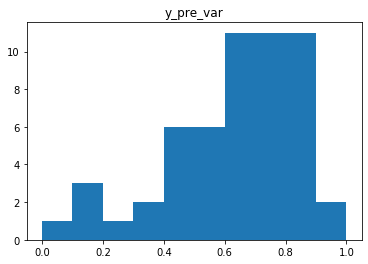

In [231]:
index = 1
plt.title(f'{features_short[index]}')
plt.hist(scaled_array[:,index]);

In [229]:
#df_features_scaled = pd.concat([df_features[['game_id', 'play_id', 'nfl_id']], pd.DataFrame(scaled_array)], axis=1)
#df_features_scaled.columns = columns_list
#df_features_scaled

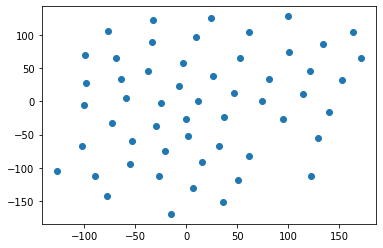

In [232]:
from sklearn.manifold import TSNE
model_tsne = TSNE()
data_tsne = model.fit_transform(scaled_array)
x_tsne = data_tsne[:,0]
y_tsne = data_tsne[:,1]
plt.scatter(x_tsne, y_tsne)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

[0.16193544 0.14320733]
82.86625201411844
0.0990853125834791


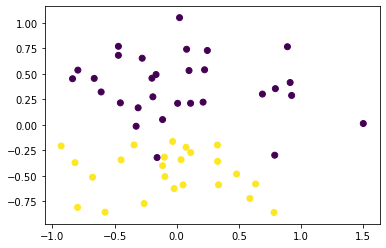

In [259]:
# all features
# min-max scaler
# no log transform
# 2 clusters

features_array = np.asarray(df_features[features])
scaled_array = min_max_scaler.fit_transform(features_array)

model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(scaled_array)
all_predictions = model_kmeans.predict(scaled_array)

model_pca = PCA(n_components=2)
scaled_pca_array = model_pca.fit_transform(scaled_array)
print(model_pca.explained_variance_ratio_)
print(model_kmeans.inertia_)
print(silhouette_score(scaled_array, all_predictions))
plt.scatter(scaled_pca_array[:,0], scaled_pca_array[:,1], c=all_predictions)

[0.24105744 0.10439984]
80.82675836565149
0.17767285369108485


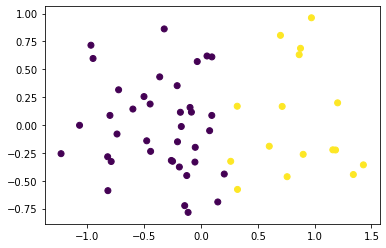

In [261]:
# all features
# min-max scaler
# log transform
# 2 clusters

features_array = np.asarray(df_features[features])
scaled_array = min_max_scaler.fit_transform(np.log(features_array))

model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(scaled_array)
all_predictions = model_kmeans.predict(scaled_array)

model_pca = PCA(n_components=2)
scaled_pca_array = model_pca.fit_transform(scaled_array)
print(model_pca.explained_variance_ratio_)
print(model_kmeans.inertia_)
print(silhouette_score(scaled_array, all_predictions))
plt.scatter(scaled_pca_array[:,0], scaled_pca_array[:,1], c=all_predictions)

[0.16271433 0.10383354]
1533.6687485169784
0.09459729935953538


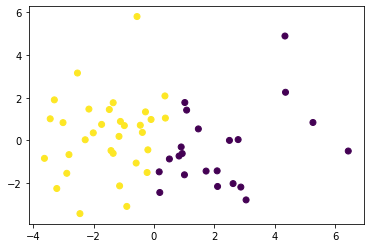

In [262]:
# all features
# standard scaler
# no log transform
# 2 clusters

features_array = np.asarray(df_features[features])
scaled_array = standard_scaler.fit_transform(features_array)

model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(scaled_array)
all_predictions = model_kmeans.predict(scaled_array)

model_pca = PCA(n_components=2)
scaled_pca_array = model_pca.fit_transform(scaled_array)
print(model_pca.explained_variance_ratio_)
print(model_kmeans.inertia_)
print(silhouette_score(scaled_array, all_predictions))
plt.scatter(scaled_pca_array[:,0], scaled_pca_array[:,1], c=all_predictions)

[0.23078844 0.10088594]
1443.3851145898923
0.17281466702690834


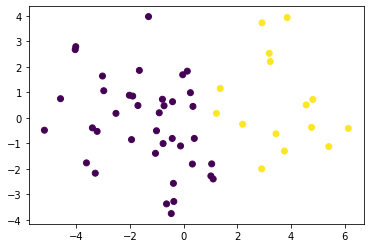

In [263]:
# all features
# standard scaler
# log transform
# 2 clusters

features_array = np.asarray(df_features[features])
scaled_array = standard_scaler.fit_transform(np.log(features_array))

model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(scaled_array)
all_predictions = model_kmeans.predict(scaled_array)

model_pca = PCA(n_components=2)
scaled_pca_array = model_pca.fit_transform(scaled_array)
print(model_pca.explained_variance_ratio_)
print(model_kmeans.inertia_)
print(silhouette_score(scaled_array, all_predictions))
plt.scatter(scaled_pca_array[:,0], scaled_pca_array[:,1], c=all_predictions)

[0.23247862 0.16151545]
29.729819161968944
0.16525524885099097


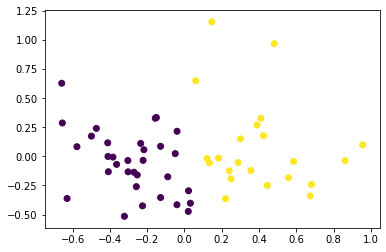

In [265]:
# subset of features
# min-max scaler
# no log transform
# 2 clusters

features_array = np.asarray(df_features[features_short])
scaled_array = min_max_scaler.fit_transform(features_array)

model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(scaled_array)
all_predictions = model_kmeans.predict(scaled_array)

model_pca = PCA(n_components=2)
scaled_pca_array = model_pca.fit_transform(scaled_array)
print(model_pca.explained_variance_ratio_)
print(model_kmeans.inertia_)
print(silhouette_score(scaled_array, all_predictions))
plt.scatter(scaled_pca_array[:,0], scaled_pca_array[:,1], c=all_predictions)

[0.31605888 0.15400148]
31.08960611662956
0.20269993618099116
[[-0.48958424  0.15752782  0.2399137  -0.20899006  0.32293122 -0.32593436
  -0.03975777 -0.27522151 -0.29962514 -0.11177435  0.28170313 -0.23682139
  -0.32969947]
 [ 0.1199703  -0.28191722 -0.05316771 -0.52402145 -0.19726668 -0.36444404
  -0.64147506 -0.06297125  0.04745094 -0.07349083 -0.14184778  0.09292394
   0.07146425]]


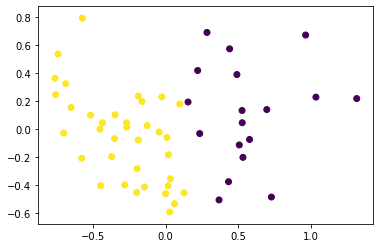

In [278]:
# looks to be best combo
# i think purple (right side) is man coverage (corresponds to lower ratio_means, o_means)

# subset of features
# min-max scaler
# log transform
# 2 clusters

features_short = ['dir_post_var', 'y_pre_var', 'x_pre_var', 'dist_off_pre_var', 'dist_def_pre_var',
                  'ratio_pre_mean', 'ratio_pre_var', 'ratio_post_mean', 'ratio_post_var',
                  'o_pre_mean', 'o_pre_var', 'o_post_mean', 'o_post_var']

features_array = np.asarray(df_features[features_short])
scaled_array = min_max_scaler.fit_transform(np.log(features_array))

model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(scaled_array)
all_predictions = model_kmeans.predict(scaled_array)

model_pca = PCA(n_components=2)
scaled_pca_array = model_pca.fit_transform(scaled_array)
print(model_pca.explained_variance_ratio_)
print(model_kmeans.inertia_)
print(silhouette_score(scaled_array, all_predictions))
print(model_pca.components_)
plt.scatter(scaled_pca_array[:,0], scaled_pca_array[:,1], c=all_predictions)

[0.19404265 0.15518086]
608.5268393787978
0.12976130021276258


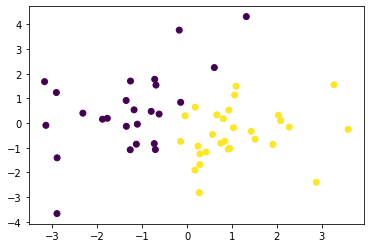

In [269]:
# subset of features
# standard scaler
# no log transform
# 2 clusters

features_array = np.asarray(df_features[features_short])
scaled_array = standard_scaler.fit_transform(features_array)

model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(scaled_array)
all_predictions = model_kmeans.predict(scaled_array)

model_pca = PCA(n_components=2)
scaled_pca_array = model_pca.fit_transform(scaled_array)
print(model_pca.explained_variance_ratio_)
print(model_kmeans.inertia_)
print(silhouette_score(scaled_array, all_predictions))
plt.scatter(scaled_pca_array[:,0], scaled_pca_array[:,1], c=all_predictions)

[0.30954033 0.14537322]
553.0580083266207
0.1940157352959573


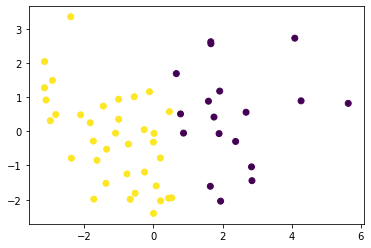

In [270]:
# subset of features
# standard scaler
# log transform
# 2 clusters

features_array = np.asarray(df_features[features_short])
scaled_array = standard_scaler.fit_transform(np.log(features_array))

model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(scaled_array)
all_predictions = model_kmeans.predict(scaled_array)

model_pca = PCA(n_components=2)
scaled_pca_array = model_pca.fit_transform(scaled_array)
print(model_pca.explained_variance_ratio_)
print(model_kmeans.inertia_)
print(silhouette_score(scaled_array, all_predictions))
plt.scatter(scaled_pca_array[:,0], scaled_pca_array[:,1], c=all_predictions)

In [253]:
from sklearn.mixture import GaussianMixture

[0.23247862 0.16151545]
0.12610089402826372


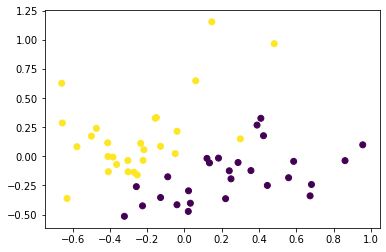

In [268]:
# min-max scaler
# subset of features
# no log transform
# 2 clusters

features_array = np.asarray(df_features[features_short])
scaled_array = min_max_scaler.fit_transform(features_array)

model_gm = GaussianMixture(n_components=2).fit(scaled_array)
all_predictions = model_gm.predict(scaled_array)

model_pca = PCA(n_components=2)
scaled_pca_array = model_pca.fit_transform(scaled_array)
print(model_pca.explained_variance_ratio_)
print(silhouette_score(scaled_array, all_predictions))
plt.scatter(scaled_pca_array[:,0], scaled_pca_array[:,1], c=all_predictions)

In [ ]:
# try hierarchical clustering?